In [2]:
!pip install qiskit[all]
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 48.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=06f21ac5afa4a3a6e498d1d0414ccd4252aa1d7f5ff4832f6366f22eb9fdfbb1
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
  Created wheel for

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

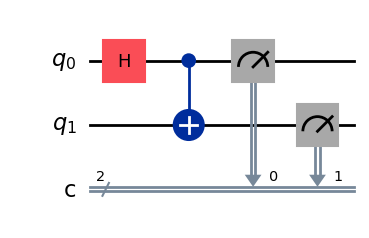

In [4]:
qc = QuantumCircuit(2, 2) # 큐비트 2개 사용, 클래식 비트(측정 결과를 저장할 공간) 2개 사용
qc.h(0) # 아다마르 게이트를 큐비트 0번에 적용
qc.cx(0, 1) # 0 -> 1번 큐비트로 CNOT (얽힘 생성)
qc.measure([0, 1], [0, 1]) # 큐비트 0, 1 -> 클래식비트 0, 1
qc.draw('mpl') # 시각화

|0⟩ 상태의 두 큐비트 중, 첫 번째 큐비트에 Hadamard 게이트를 적용하면 큐비트는 (|0⟩ + |1⟩) / √2 상태가 된다.
그 다음, 제어 큐비트인 0번 큐비트와 대상 큐비트인 1번 큐비트 사이에 CNOT 게이트를 적용하면, 두 큐비트는 얽힘 상태가 된다.
이 상태는 (|00⟩ + |11⟩) / √2 로 표현되며, 측정 시 두 큐비트는 항상 같은 값(00 또는 11)으로 “붕괴”된다.
측정 결과는 각각의 클래식 비트에 저장된다.

CNOT은 “제어된 반전 게이트”이기 때문에, 제어 큐비트가 중첩 상태일 때 CNOT을 적용하면 두 큐비트의 상태가 서로 얽히게 된다.
결과적으로 두 큐비트는 개별적으로 나눌 수 없는 상태, 즉 얽힘 상태가 된다.

In [5]:
sim = AerSimulator()
result = sim.run(qc, shots=100).result() # 회로를 100번 반복 실행하고 결과 반환
counts = result.get_counts() # 각 측정 결과가 몇 번 나왔는지 세어봄
print(counts)

{'00': 49, '11': 51}
